# Plotting and Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#### Data

The dataset below is the actual average number of days in Denver that it is sunny, raining or snowing.  We copied the file over and use the %%writefile to be write the file locally.

In [2]:
%%writefile denver_weather.csv

Month,Sun,Rain,Snow
2018-01,26,2,3
2018-02,22,2,4
2018-03,25,3,3
2018-04,24,6,2
2018-05,25,6,0
2018-06,26,4,0
2018-07,26,5,0
2018-08,26,5,0
2018-09,26,4,0
2018-10,27,3,1
2018-11,26,2,2
2018-12,25,2,4

Writing denver_weather.csv


In [3]:
# read in the dataset

df = pd.read_csv("denver_weather.csv")

In [4]:
# check the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
Month    12 non-null object
Sun      12 non-null int64
Rain     12 non-null int64
Snow     12 non-null int64
dtypes: int64(3), object(1)
memory usage: 464.0+ bytes


In [5]:
# Again we want the first column to be of type 'datatime' rather than a generic object
# Converting the object to a datetime type
# Full conversion syntax is at: https://docs.python.org/3.6/library/datetime.html#strftime-and-strptime-behavior

df.Month = pd.to_datetime(df.Month, format="%Y-%m")

In [6]:
# Re-checking the types - confirmed month is now a datetime type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
Month    12 non-null datetime64[ns]
Sun      12 non-null int64
Rain     12 non-null int64
Snow     12 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 464.0 bytes


In [7]:
# checking the rest of the data to make sure it loaded in ok.

df.head()

,Month,Sun,Rain,Snow
0,2018-01-01,26,2,3
1,2018-02-01,22,2,4
2,2018-03-01,25,3,3
3,2018-04-01,24,6,2
4,2018-05-01,25,6,0


In [8]:
# Looking at the numerical columns - nothing looks too out of the ordinary 
# For example the snow column has a min of 0 - if this was a minimum of 1 that might be concerning 
# (does it snow in Denver in August??)

df.describe()

,Sun,Rain,Snow
count,12.000000,12.000000,12.000000
mean,25.333333,3.666667,1.583333
std,1.302678,1.556998,1.621354
min,22.000000,2.000000,0.000000
25%,25.000000,2.000000,0.000000
50%,26.000000,3.500000,1.500000
75%,26.000000,5.000000,3.000000
max,27.000000,6.000000,4.000000


## MatPlotLib

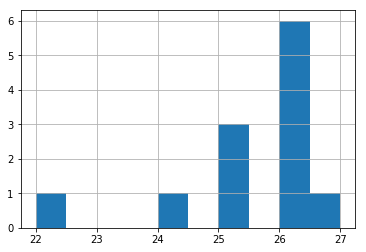

In [9]:
# ok lets start with a quick exploratory data analysis of each column by plotting the histogram of each

df['Sun'].hist()

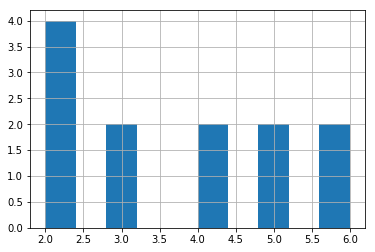

In [10]:
df['Rain'].hist()

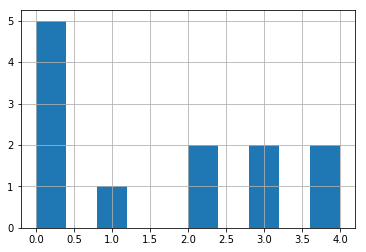

In [11]:
df['Snow'].hist()

#### Line charts

Good to use a line chart when you want to see trends or time-series.  

[]

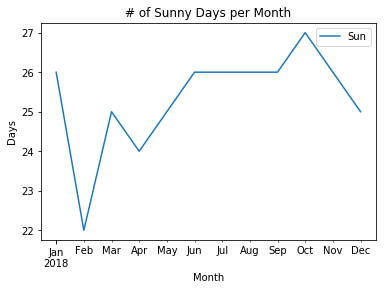

In [12]:
# Below is an individual line on a line chart.  The .plot() command defaults to a line chart - just need to specify 
# The x and y axis variables

ax = df.plot(x="Month", y="Sun")
ax.set(xlabel='Month', ylabel='Days', title="# of Sunny Days per Month")
plt.plot()

[]

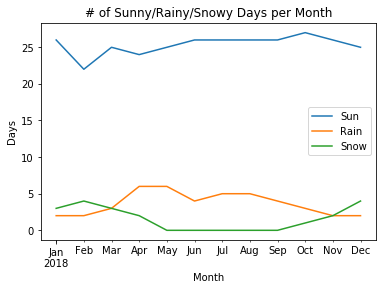

In [13]:
# Can also make multiple lines on a chart with the .plot command by sending the y axis a list of columns you want to plot

ax = df.plot(x="Month", y=["Sun", "Rain", "Snow"])
ax.set(xlabel='Month', ylabel='Days', title="# of Sunny/Rainy/Snowy Days per Month")
plt.plot()

[]

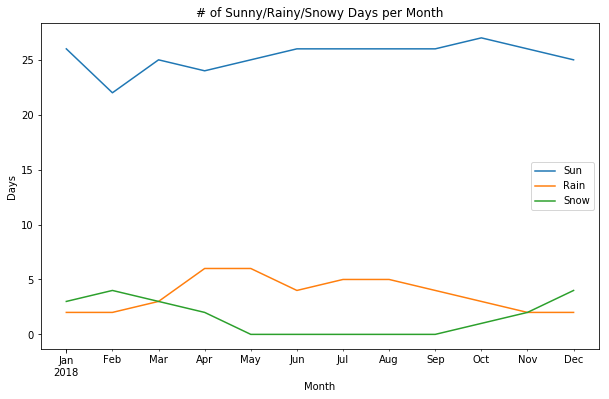

In [14]:
# Maybe that chart is a little small to see - can add a figsize parameter to the plot to make it larger


ax = df.plot(x="Month", y=["Sun", "Rain", "Snow"], figsize=(10,6))
ax.set(xlabel='Month', ylabel='Days', title="# of Sunny/Rainy/Snowy Days per Month")
plt.plot()

#### Scatterplot

Good to see a relationship between two different variables

[]

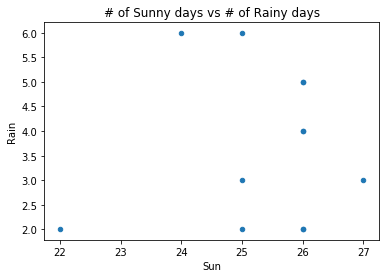

In [15]:
# For this plot we can see the days of sun vs the days of rain 

ax = df.plot.scatter(x='Sun', y='Rain')
ax.set(xlabel='Sun', ylabel='Rain', title="# of Sunny days vs # of Rainy days")
plt.plot()

#### Bar chart

Useful for displaying different categories over different rows (usually done with non-time-series data)

[]

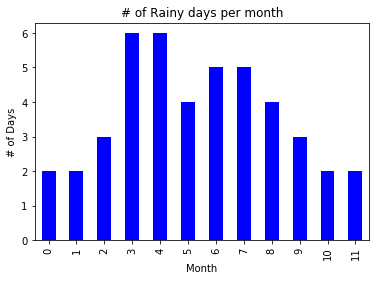

In [16]:
# Here we are plotting just the instances of rain

ax = df['Rain'].plot.bar(color = 'b')
ax.set(xlabel='Month', ylabel='# of Days', title="# of Rainy days per month")
plt.plot()

[]

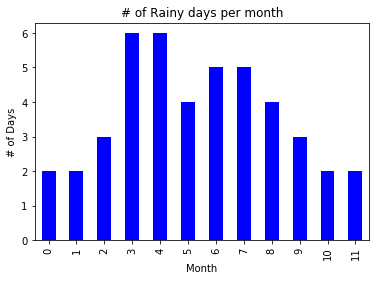

In [17]:
# Another way you can do the same chart:
ax = df['Rain'].plot(color = 'b', kind='bar')
ax.set(xlabel='Month', ylabel='# of Days', title="# of Rainy days per month")
plt.plot()



[]

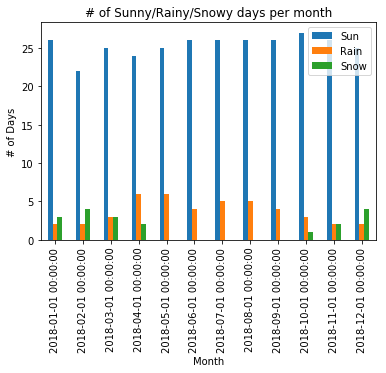

In [18]:
# Can also plot multiple items for each bar

ax = df.plot(x="Month", y=["Sun", "Rain", "Snow"], kind="bar")
ax.set(xlabel='Month', ylabel='# of Days', title="# of Sunny/Rainy/Snowy days per month")
plt.plot()

[]

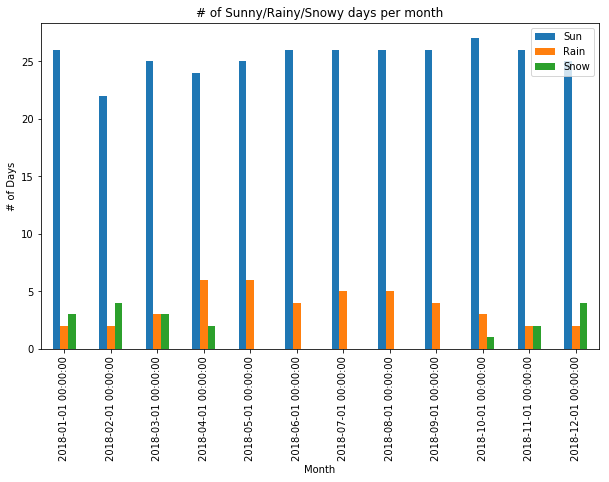

In [19]:
# And bigger!

ax = df.plot(x="Month", y=["Sun", "Rain", "Snow"], kind="bar", figsize = (10,6))
ax.set(xlabel='Month', ylabel='# of Days', title="# of Sunny/Rainy/Snowy days per month")
plt.plot()

[]

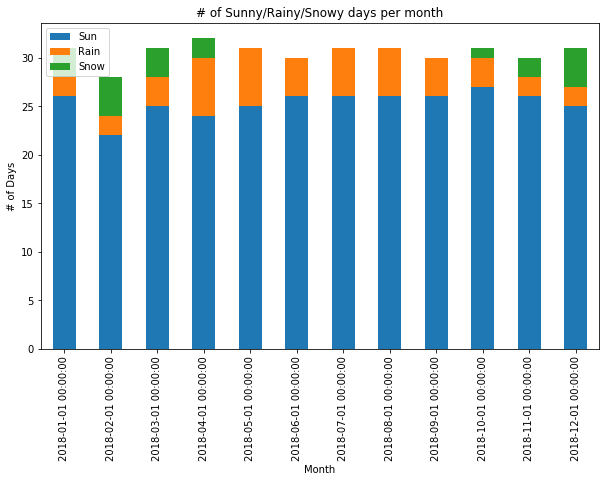

In [20]:
# Or stacked

ax = df.plot(x="Month", y=["Sun", "Rain", "Snow"], kind="bar", figsize = (10,6), stacked=True)
ax.set(xlabel='Month', ylabel='# of Days', title="# of Sunny/Rainy/Snowy days per month")
plt.plot()

## Seaborn

Is another charting library that you can use (and maybe makes nicer charts?)

In [21]:
# Importing the seaborn library and setting the grid to be visible

import seaborn as sns
sns.set(style="darkgrid")


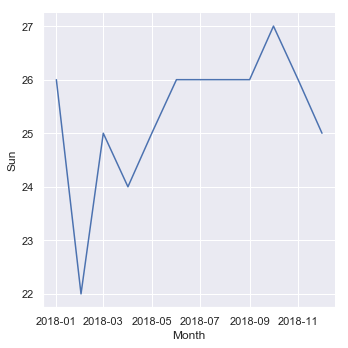

In [22]:
sns.relplot(x="Month", y="Sun", kind="line", data=df)


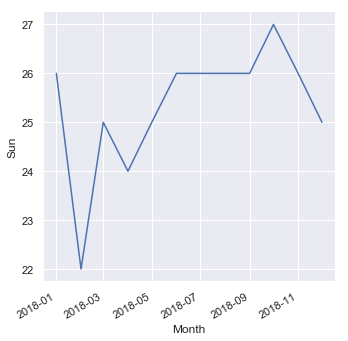

In [23]:
# One to make the date angled and more readable

g = sns.relplot(x="Month", y="Sun", kind="line", data=df)
g.fig.autofmt_xdate()

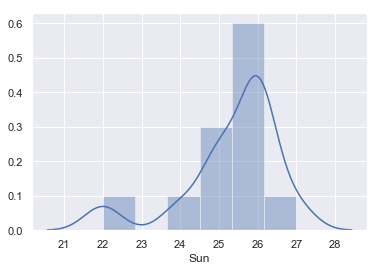

In [26]:
# A Histogram with seaborn (automatically) adding in a distribution curve

sns.distplot(df['Sun'])

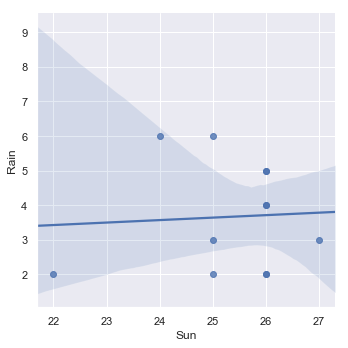

In [27]:
# A scatter plot with Seaborn (automatically) adding in a correlation line and errors

sns.lmplot(x='Sun', y='Rain', data=df)